Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aram Klijn, 1279660"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# Assignment 3

This is the assignment for week 3. This was actually an exam in a previous year. We give the points to give you an idea of how such an exam works. However, we grade assignments only as pass or fail.

# Bargaining model

In a previous class we considered a two period bargaining model. Then we extended this to a three period model.

In this assignment we are going to extend the model to $n$ periods, where $n$ is a variable.


# Import libraries

First, we need to import some libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [3]:
import numpy as np
min_offer = 0.0
max_offer = 10.0
offers = np.arange(min_offer,max_offer,0.1)
print(offers)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9]


**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the previous class:

In [4]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept
 
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [5]:
offer = {}

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [6]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer

**5)** [0.5 point] Check the outcomes for the case where $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [7]:
delta = 0.9
print(outcome(1,0.9))
print(outcome(2,0.9))
print(outcome(3,0.9))

{1: (0.0, 10.0, 0.0), 2: [0, 0, 0]}
{1: (9.0, 1.0, 9.0), 2: (0.0, 10.0, 0.0), 3: [0, 0, 0]}
{1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002), 2: (9.0, 1.0, 9.0), 3: (0.0, 10.0, 0.0), 4: [0, 0, 0]}


**6)** [1 point] Plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game; on the vertical axis the payoff to player 1.

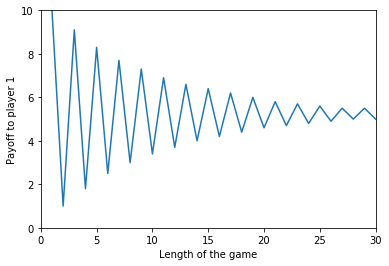

In [8]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)

y=[]
for i in range_n:
    y.append(outcome(i,delta)[1][1])

plt.xlim(0,30)
plt.ylim(0.0,10.0)
plt.xticks([0,5,10,15,20,25,30])

plt.xlabel("Length of the game")
plt.ylabel("Payoff to player 1")
plt.plot(range_n,y)
plt.show()

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this?

The graph fluctuates quite heavily in the beginning of the game, however it converges to a specific point the longer the game goes on. This means that player 1's payoff becomes more stable as the game goes on longer.